In [ ]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

import io

dataset = pd.read_csv('/content/drive/MyDrive/creditcard_1.csv')

Mounted at /content/drive


In [ ]:
print(dataset.shape)

(2001, 31)


In [ ]:
X = dataset.drop('Class', axis=1) # Features
y = dataset['Class'] # Target variable

In [ ]:
train_x, test_x, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(train_x.shape)
print(test_x.shape)

(1400, 30)
(601, 30)


In [ ]:
clf=RandomForestClassifier(n_estimators=50)
clf.fit(train_x, train_Y)

RandomForestClassifier(n_estimators=50)

In [ ]:
dataset1=dataset.drop('Class', axis=1);
print(dataset1.shape)

(2001, 30)


In [ ]:
y_pred=clf.predict(test_x)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_Y, y_pred)
cnf_matrix

array([[445,   2],
       [ 19, 135]])

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

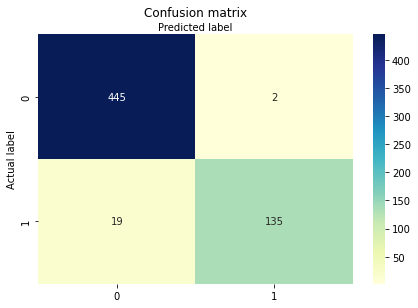

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(confusion_matrix(test_Y,y_pred))
print(classification_report(test_Y,y_pred))

[[445   2]
 [ 19 135]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       447
           1       0.99      0.88      0.93       154

    accuracy                           0.97       601
   macro avg       0.97      0.94      0.95       601
weighted avg       0.97      0.97      0.96       601



In [ ]:
print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))
print("Precision:",metrics.precision_score(test_Y, y_pred))
print("Recall:",metrics.recall_score(test_Y, y_pred))
print("F1_score:",metrics.f1_score(test_Y, y_pred))

Accuracy: 0.9650582362728786
Precision: 0.9854014598540146
Recall: 0.8766233766233766
F1_score: 0.9278350515463918


In [ ]:
roc_auc_score(test_Y, clf.predict_proba(test_x)[:, 1])

0.9857854673290914